# CLUSTERING (K-MEANS) ASSESMENT WITH ELBOW METHOD
Il focus di questo script è quello di valutare la capacità dell'algoritmo k-means di "riconoscere" il pattern e il numero di cluster generati a cui viene tolta la variabile (y) indicatrice del cluster. \

Riferimenti: \
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html (For generating)\
https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation (For visualizing)


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Genero un dataset a 2 dimensioni che contiene 4 gruppi differenti
First, let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

In [20]:
from sklearn.datasets.samples_generator import make_blobs

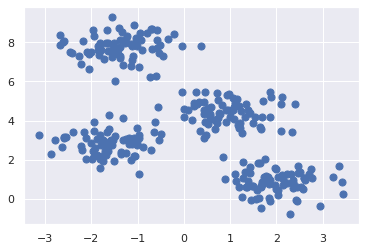

In [21]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizzo i veri cluster generati sopra
Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

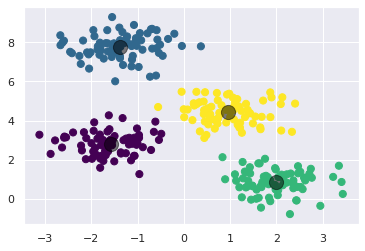

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
##################################



# Simulo per 10 volte (per k che va da 1 a 10) il il kmeans e valuto per ogni iterazione SSE

In [41]:
SSE=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
# kmeans.inertia = = SSE = Sum of squared distances of samples to their closest cluster center.



In [44]:
MSE = []

for i in SSE:
    getMSE = i/len(X)
    MSE.append(getMSE)
MSE
# MSE = SSW + SSB

[9.373791984344113,
 3.9692745312144817,
 1.8229705015420987,
 0.706686654036116,
 0.6294328655439475,
 0.566799917465036,
 0.5090564445553931,
 0.45608084616959094,
 0.4148233819926893,
 0.37529126676576424]

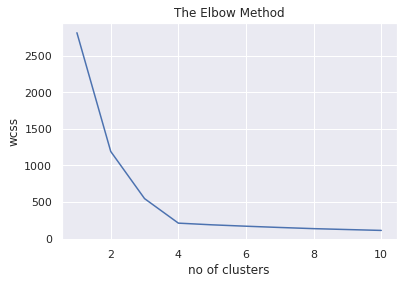

In [33]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

# If you zoom out this curve then you will see that last elbow comes at k=4